In [55]:
ls ../../3_regular

4_graphs/


In [56]:
import os
from classical_optimization.terra.utils import read_graph
path = '../../3_regular'
all_data = {}
qubit_numbers = []
for folder in os.listdir(path):
    num_qubits = int(folder.split('_')[0])
    qubit_numbers.append(num_qubits)
    for graph_file in os.listdir(os.path.join(path, folder)):
        graph_data = read_graph(os.path.join(path, folder, graph_file))
        extant_data = all_data.get(num_qubits, [])
        extant_data.append(graph_data)
        # Probably don't need this, since it's the same list...
        all_data[num_qubits] = extant_data

In [57]:
graph_data

{'graph': <networkx.classes.graph.Graph at 0x7f0a6ddae070>,
 'landscape_d40_b0.7853981633974483_g3.141592653589793_b-0.7853981633974483_g-3.141592653589793': array([[ 5.55111512e-17,  2.93525152e-01,  1.05922459e+00, ...,
          1.05922459e+00,  2.93525152e-01,  5.55111512e-17],
        [-2.56739074e-16,  1.42996671e-01,  7.80765519e-01, ...,
          1.32396698e+00,  4.40252560e-01,  1.90819582e-16],
        [-3.74700271e-16, -7.43427588e-03,  4.95801714e-01, ...,
          1.56813600e+00,  5.79378731e-01,  5.48172618e-16],
        ...,
        [ 4.09394740e-16,  5.79378731e-01,  1.56813600e+00, ...,
          4.95801714e-01, -7.43427588e-03, -3.95516953e-16],
        [ 1.90819582e-16,  4.40252560e-01,  1.32396698e+00, ...,
          7.80765519e-01,  1.42996671e-01, -2.56739074e-16],
        [ 5.55111512e-17,  2.93525152e-01,  1.05922459e+00, ...,
          1.05922459e+00,  2.93525152e-01,  5.55111512e-17]]),
 'landscape_d40_b0.7853981633974483_g3.141592653589793_b-0.7853981633974

In [58]:
qubit_numbers = [4]

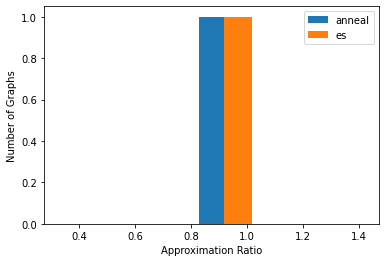

In [59]:
import matplotlib.pyplot as plt
import numpy as np
for num_qubits in qubit_numbers:
    anneal_ratios = []
    es_ratios = []
    for graph_data in all_data[num_qubits]:
        if graph_data.get('annealing_result') is not None:
            annealing_approx_ratio = graph_data.get('annealing_result')[1]/graph_data.get('maxarg_result')[1]
            es_approx_ratio = graph_data.get('es_result')[1]/graph_data.get('maxarg_result')[1]
            anneal_ratios.append(annealing_approx_ratio)
            es_ratios.append(es_approx_ratio)
    if len(anneal_ratios) > 0:
        plt.hist(anneal_ratios, label='anneal')
        plt.hist(es_ratios, label='es')
        plt.xlabel('Approximation Ratio')
        plt.ylabel('Number of Graphs')
        plt.legend()
    plt.show()

In [60]:
graph_data['annealing_result']

(array([ 0.36904124, -0.19824837]),
 3.44,
 [(array([0., 0.]), 2.93),
  (array([-0.30405837,  0.19594163]), 2.71),
  (array([ 0.11746947, -0.06310442]), 3.55),
  (array([-0.82474868, -0.06310442]), 3.37),
  (array([0.11746947, 0.0421764 ]), 2.47)])

In [69]:
len(graph_data['es_result'])

3

In [62]:
np.array([result[0] for result in graph_data['es_result'][-1]]) * np.pi

array([[-0.24307057,  0.26652618],
       [-0.27276473,  0.32106631],
       [-0.23634726,  0.25431819],
       [-0.31489067,  0.22238314],
       [-0.35448347,  0.24967837],
       [-0.29446391,  0.25824647],
       [-0.20964831,  0.31740632],
       [-0.24665126,  0.30808959],
       [-0.18677354,  0.29489434],
       [-0.20674055,  0.32700164],
       [-0.30871832,  0.32317491],
       [-0.31220204,  0.26878579],
       [-0.25795515,  0.261859  ],
       [-0.23266182,  0.34794884],
       [-0.28368936,  0.2996596 ],
       [-0.29073266,  0.26179397],
       [-0.36070445,  0.22745811],
       [-0.20708293,  0.27827295],
       [-0.34392094,  0.25038888],
       [-0.24406214,  0.24033994],
       [-0.26721969,  0.24385694],
       [-0.29855459,  0.24741613],
       [-0.23171938,  0.26721671],
       [-0.27510932,  0.31751347],
       [-0.2890205 ,  0.24558707],
       [-0.35434716,  0.27432176],
       [-0.30760879,  0.27872364],
       [-0.31715228,  0.30966754],
       [-0.29492423,

In [63]:
graph_data['maxarg_result']

(515, 4.1517924981204795)

# Time to figure out how to plot landscapes...

In [64]:
def plot_landscape(landscape, max_gamma, max_beta, min_gamma, min_beta, scatterpoints=None):
    ax = plt.imshow(landscape)
    if scatterpoints is None:
        scatterpoints = []
    for scatterpoint in scatterpoints:
        plt.scatter(scatterpoint[0][1], scatterpoint[0][0], c=scatterpoint[1], s=100, marker='*')
    ax.figure.canvas.draw()

    subplot = ax.figure.get_axes()[0]

    ticks = subplot.get_xticklabels()
    scale = 1/max([float(tick.get_text().replace('−', '-')) for tick in ticks if tick.get_text() != ''])
    scale *= max_gamma - min_gamma
    for tick in ticks:
        if tick.get_text() != '':
            tick.set_text(round(scale * float(tick.get_text().replace('−', '-')) - max_gamma, 2))
        subplot.set_xticklabels(ticks)

    ticks = subplot.get_yticklabels()
    scale = 1 / max([float(tick.get_text().replace('−', '-')) for tick in ticks if tick.get_text() != ''])
    scale *= max_beta - min_beta
    for tick in ticks:
        if tick.get_text() != '':
            tick.set_text(-1 * round(scale * float(tick.get_text().replace('−', '-')) - max_beta, 2))
        subplot.set_yticklabels(ticks)

    plt.ylabel(r"$\beta$")
    plt.xlabel(r"$\gamma$")

In [65]:
graph_data.get('es_result')[0]

array([-0.30612954,  0.2720589 ])

NUMQUBITS: 4
-0.3061295360070972 0.27205889960788243


<ipython-input-64-975018fa7025>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_xticklabels(ticks)
<ipython-input-64-975018fa7025>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_yticklabels(ticks)


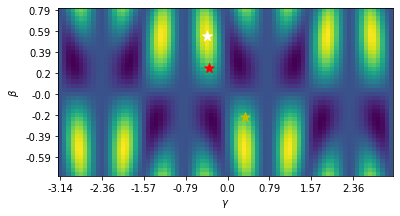

In [66]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
for num_qubits in qubit_numbers:
    print(f"NUMQUBITS: {num_qubits}")
    for graph_data in all_data[num_qubits]:
        landscape = None
        for k in graph_data.keys():
            if 'landscape' in k and 'time' not in k:
                _, disc, max_beta, max_gamma, min_beta, min_gamma = k.split('_')
                disc = int(disc[1:])
                max_beta = float(max_beta[1:])
                min_beta = float(min_beta[1:])
                max_gamma = float(max_gamma[1:])
                min_gamma = float(min_gamma[1:])
                landscape = graph_data[k]
        if landscape is not None:
            ind = np.argmax(landscape)
            ind = np.unravel_index(ind,landscape.shape)
            scatterpoints = [(ind, 'w')]
            skip = False
            for result, color in [('annealing_result', 'y'), ('es_result', 'r')]:
                if graph_data.get(result) is not None:
                    gamma, beta = graph_data.get(result)[0]
                    y, x = ((beta - min_beta) % (max_beta-min_beta)) * (disc - 1) / (max_beta-min_beta), ((gamma - min_gamma) % (max_gamma - min_gamma)) * (2*disc-1)/(max_gamma-min_gamma)
                    scatterpoints.append(((disc - y, x), color))
                else:
                    skip = True
            if skip:
                continue
            plot_landscape(landscape, max_gamma, max_beta, min_gamma, min_beta, scatterpoints)  
            print(gamma, beta)
            plt.show()

In [85]:
np.max(landscape)

4.15179249812048

In [83]:
graph_data['graph'].get_edge_data(0,2)

{'weight': 1}